In [341]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Definerer symboler
bta, E, alpha, T, w, L, ls, ld = sp.symbols('beta E alpha T w L L^s L^d')

# Utledning matematisk av minstelønn under fullkommen konkurranse

# Labour demand (1)
def L_D(E,alpha,w):
    return (E/alpha)-(1/alpha)*w

# Labour supply (2) 
def L_S(T,bta,w):
    return -(T/bta)+(1/bta)*w

# Setter labour demand = labour supply (3)
eq_cond=sp.Eq(L_D(E,alpha,w),L_S(T,bta,w))

# Løser for w og finner lønnen under fullkommen konkurranse for w (4)
w_eq=sp.solve(eq_cond,w)

# Løser for L og finner labour under fullkommen konkurranse for L (5)
L_eq=L_D(E,alpha,w_eq[0])

L_eq_s = L_S(E,bta, w_eq[0])
# Definerer numeriske verdier for å plotte
E_num = 250
a = 0.5
x = np.arange(0,550,1)
b = 0.5
T_num = 10

# Løser likevekt for w (4) med tallverdier
w_eq_num = float(w_eq[0].subs({E: E_num, alpha: a, T: T_num, bta: b}))
# Løser likevekt for L (5) med tallverdier
L_eq_num = float(L_D(E_num, a, w_eq_num))


# Løser for etterspørsel og finner etterspørselskurven (6)
etterspørsel = sp.solve(sp.Eq(L, L_D(E,alpha,w)), w)

# Definerer etterspørselskurven, bytter om på L og a men har lite betydning
def e_p(E,L,a):
    return E - a*L

# Løser for w og finner tilbudskurven
tilbud = sp.solve(sp.Eq(L_S(T,bta,w), L), w)

# Definerer tilbudskurven, bytter litt om på variablene slik at det blir enklere
def t_b(T,b,L):
    return T + b*L 

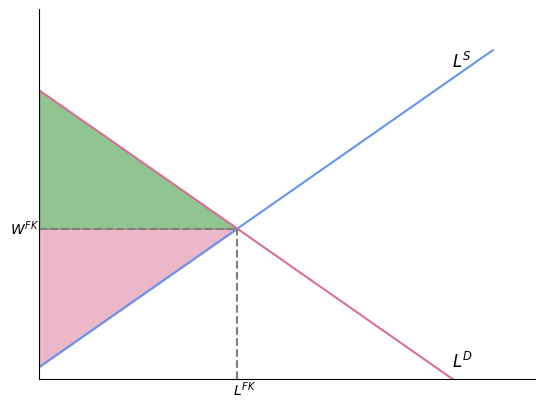

In [345]:
# Plotter likevekt uten minstelønn under fullkommen konkurranse
# Creating the axa for plotting
def create_ax():
    fig, ax = plt.subplots()
    ax.set(xlim=(0, 600))
    ax.set(ylim=(0, 320))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

# Starting fig
fig, ax = create_ax()
# Plotter tilbud
ax.plot(x, t_b(T_num,b,x), label='Tilbud', color="cornflowerblue")
# Plotter etterspørsel
ax.plot(x,e_p(E_num,a,x), label='Etterspørsel', color="palevioletred")
ax.set_xlim(0,600)
ax.set_ylim(0,320)
# Tegner en stiplet linje til likevekt
ax.vlines(L_eq_num, 0, w_eq_num, linestyles='dashed', color="grey")
ax.hlines(w_eq_num, 0, L_eq_num, linestyles='dashed', color="grey")
# Lager L^FK som skal være rett atmed L_eq_num
ax.annotate('$L^{FK}$', xy=(L_eq_num-5, -14), annotation_clip=False)
# Lager w^FK
ax.annotate('$W^{FK}$', xy=(-35, w_eq_num-5), annotation_clip=False)
# Lager L^S
ax.annotate('$L^S$', xy=(500, 270), size=12)
# Lager L^D
ax.annotate('$L^D$', xy=(500,10), size=12)

x_1 = np.arange(0,L_eq_num,1)
# Fyller inn overskudd
ax.fill_between(x_1, w_eq_num,e_p(E_num, x_1, b), color="forestgreen", alpha=0.5)

# Fyller inn overskudd igjen
ax.fill_between(x_1, w_eq_num, t_b(T_num, a, x_1), color="palevioletred", alpha=0.5)

plt.show()

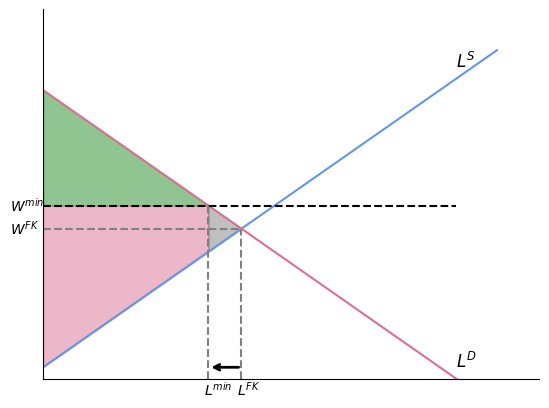

In [346]:
# løser for minstelønn på 150 for Labour
w_min = 150
L_eq_num_min = float(L_D(E_num, b,w_min))

# Starting fig
fig, ax = create_ax()

# Plotter tilbud
ax.plot(x, t_b(T_num,b,x), label='Tilbud', color="cornflowerblue")
# Plotter etterspørsel
ax.plot(x,e_p(E_num,a,x), label='Etterspørsel', color="palevioletred")

# Tegner en stiplet linje til likevekt
ax.vlines(L_eq_num, 0, w_eq_num, linestyles='dashed', color="grey")
ax.hlines(w_eq_num, 0, L_eq_num, linestyles='dashed', color="grey")

# Lager L^FK som skal være rett atmed L_eq_num
ax.annotate('$L^{FK}$', xy=(L_eq_num-5, -14), annotation_clip=False)
# Lager w^FK
ax.annotate('$W^{FK}$', xy=(-40, w_eq_num-5), annotation_clip=False)
# Lager L^S
ax.annotate('$L^S$', xy=(500, 270), size=12)

# Definerer integralet for dødvektstapet
x_2 = np.arange(0,L_eq_num_min+1,1)
# Definerer en tredje x som brukes til å vite hvor jeg integrerer
x_3 = np.arange(L_eq_num_min, L_eq_num+1,1).astype(float)

# Fyller inn overskudd
ax.fill_between(x_2, w_min,e_p(E_num, x_2, b), color="forestgreen", alpha=0.5)

# Fyller inn overskudd igjen
ax.fill_between(x_2, w_min, t_b(T_num, a, x_2), color="palevioletred", alpha=0.5)

# Fyller inn dødvektstapet
ax.fill_between(x_3, e_p(E_num, x_3, b), t_b(T_num, a, x_3), color="grey", alpha=0.5)

# Lager L^D
ax.annotate('$L^D$', xy=(500,10), size=12)
# Legger til en minstelønn på 150
ax.hlines(w_min, 0, 500, linestyles='--', color="black")
# Lager W^min
ax.annotate('$W^{min}$', xy=(-40,145), annotation_clip=False)
# Lager en ny linje til likevekten for L^min
ax.vlines(L_eq_num_min, 0, w_min, linestyles='dashed', color="grey")
# Putter inn L^min
ax.annotate('$L^{min}$', xy=(L_eq_num_min-5,-14), annotation_clip=False)
# Lager en pil
ax.annotate("", (L_eq_num_min,10), (L_eq_num, 10), arrowprops={"arrowstyle":"->", "color":"black", "lw":2})
plt.show()

In [347]:
# Starter utregningen for monopsoni

FK_TC = w*L
FK_TC_diff = sp.diff(FK_TC, L)

#monop_TC= w(L)*L
monop_tc=(T+bta*L) *L
monop_tc_diff = sp.diff(monop_tc, L)
monop_tc_diff #grensekostnad

# E-alpha*L = MRP
MRP = (E-alpha*L)

betingelse = sp.Eq(monop_tc_diff, MRP)

L_tilbud = sp.solve(betingelse, L)[0]

L_tilbud_num = L_tilbud.subs([(E, E_num), (alpha, a), (T, T_num), (bta, b)])

w_tilbud = T+bta*L_tilbud_num

w_tilbud_num = w_tilbud.subs([(T, T_num), (bta, b)])

#grenseinntekt = grensekostnad
mlc = monop_tc_diff

# Definerer den nye funksjonen for mlc
def t_b_monopsoni(T,b,L):
    return 2*L*b+T

In [348]:
mlc

2*L*beta + T

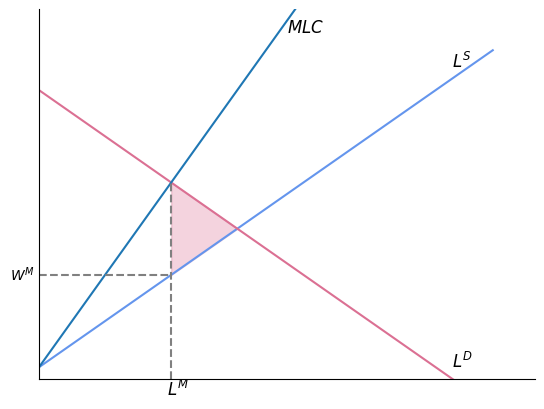

In [349]:
# Plotter likevekt under monopsoni uten minstelønn

# Starting fig
fig, ax = create_ax()
# Plotter tilbud
ax.plot(x, t_b(T_num,b,x), label='Tilbud', color="cornflowerblue")
# Plotter etterspørsel
ax.plot(x,e_p(E_num,a,x), label='Etterspørsel', color="palevioletred")
ax.set_xlim(0,600)
ax.set_ylim(0,320)

# Lager L^S
ax.annotate('$L^S$', xy=(500, 270), size=12)
# Lager L^D
ax.annotate('$L^D$', xy=(500,10), size=12)

# Legger til MLC
ax.plot(x, t_b_monopsoni(T_num,b,x))

# Tegner en stiplet linje til likevekt
ax.vlines(L_tilbud_num, 0, t_b_monopsoni(T_num,b,L_tilbud_num), linestyles='dashed', color="grey")
ax.hlines(w_tilbud_num, 0, L_tilbud_num, linestyles='dashed', color="grey")

ax.annotate('$W^M$', xy=(-35, w_tilbud_num-5), annotation_clip=False)
# Lager L^S
ax.annotate('$MLC$', xy=(300, 300), size=12)
# Lager L^D
ax.annotate('$L^M$', xy=(L_tilbud_num-5,-14), size=12, annotation_clip=False)

x_5 = np.arange(L_tilbud_num,L_eq_num+1,1).astype(float)

ax.fill_between(x_5,e_p(E_num, x_5, b), t_b(T_num, a, x_5), color ="palevioletred", alpha =0.3)

plt.show()

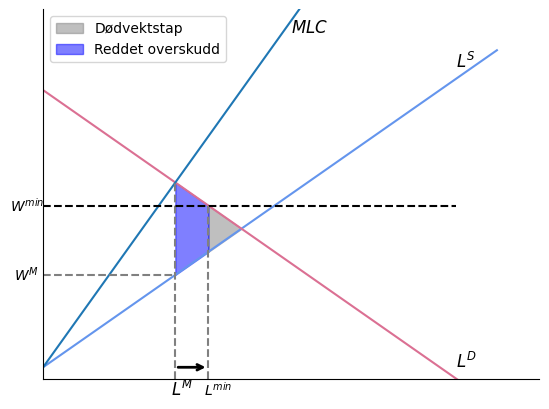

In [350]:
# Plotter likevekt med minstelønn under monopsoni

# Starting fig
fig, ax = create_ax()
# Plotter tilbud
ax.plot(x, t_b(T_num,b,x), color="cornflowerblue")
# Plotter etterspørsel
ax.plot(x,e_p(E_num,a,x), color="palevioletred")
ax.set_xlim(0,600)
ax.set_ylim(0,320)

# Lager L^S
ax.annotate('$L^S$', xy=(500, 270), size=12)
# Lager L^D
ax.annotate('$L^D$', xy=(500,10), size=12)

# Legger til MLC
ax.plot(x, t_b_monopsoni(T_num,b,x))

# Tegner en stiplet linje til likevekt
ax.vlines(L_tilbud_num, 0, t_b_monopsoni(T_num,b,L_tilbud_num), linestyles='dashed', color="grey")
ax.hlines(w_tilbud_num, 0, L_tilbud_num, linestyles='dashed', color="grey")

ax.annotate('$W^M$', xy=(-35, w_tilbud_num-5), annotation_clip=False)
# Lager L^S
ax.annotate('$MLC$', xy=(300, 300), size=12)
# Lager L^D
ax.annotate('$L^M$', xy=(L_tilbud_num-5,-14), size=12, annotation_clip=False)

# Legger til en minstelønn på 150
ax.hlines(w_min, 0, 500, linestyles='--', color="black")
# Lager W^min
ax.annotate('$W^{min}$', xy=(-40,145), annotation_clip=False)
# Lager en ny linje til likevekten for L^min
ax.vlines(L_eq_num_min, 0, w_min, linestyles='dashed', color="grey")
# Putter inn L^min
ax.annotate('$L^{min}$', xy=(L_eq_num_min-5,-14), annotation_clip=False)
# Fyller inn dødvektstapet
ax.fill_between(x_3, e_p(E_num, x_3, b), t_b(T_num, a, x_3), color="grey", alpha=0.5, label="Dødvektstap")
# fyller inn anti-dødvektstapet
x_6 = np.arange(L_tilbud_num,L_eq_num_min+1,1).astype(float)
# hva enn det enn heter
ax.fill_between(x_6,e_p(E_num, x_6, b), t_b(T_num, a, x_6), color="blue", alpha=0.5, label = "Reddet overskudd")
# Lager en pil
ax.annotate("", (L_tilbud_num,10), (L_eq_num_min, 10), arrowprops={"arrowstyle":"<-", "color":"black", "lw":2})
ax.legend(loc="best")
plt.show()

In [351]:
# Begynner på grafisk analyse av fagforeninger
L =sp.symbols("L", real=True, positive=True)

# Define a function that describes the market's labor demand
Uf = ((800 - 0.08 * L) - 100) * L 

L_derivert = sp.diff(Uf, L)

# Finner L_max
L_max = sp.solve(L_derivert, L)[0]

w = 800 - 0.08 * L

w_max = w.subs(L, L_max)

nytte = (w_max - 100) * L_max

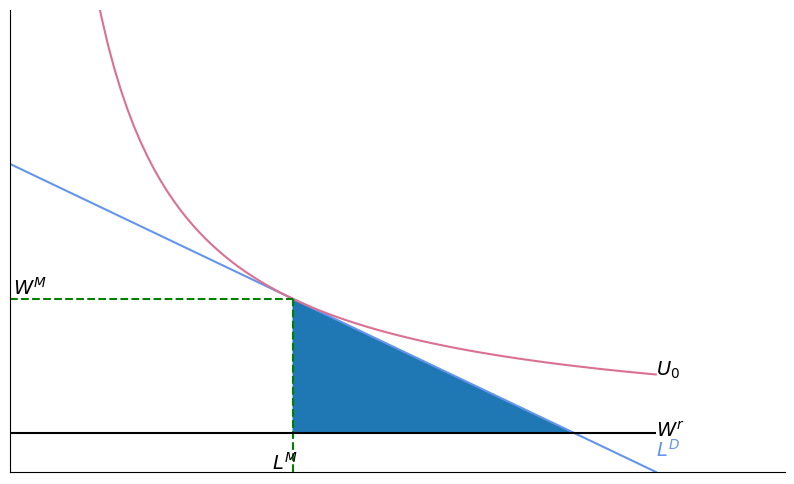

In [355]:
x8 = np.linspace(0.01, 10000, 100)
x9 = np.linspace(float(L_max), 8670, 100)

def wages(x8):
    return 800 - 0.08 * x8

nyttekurve = sp.solve(Uf - nytte, w)

nyttekurve_func = sp.lambdify(L, nyttekurve[0])

# Plotte show
def create_ax():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set(xlim=(0, 12000))
    ax.set(ylim=(0, 1200))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax

fig, ax = create_ax()



# Plotter labour demand
ax.plot(x8, wages(x8), color = "cornflowerblue")

# Plotter indif
ax.plot(x8,nyttekurve_func(x8), color="palevioletred")

# equlibrium
ax.vlines(L_max,0, w_max, color='green', linestyle='dashed')
ax.hlines(w_max,0,L_max, color="green", linestyles="dashed")

# verdi for minstelønn som er 100
ax.hlines(100,10000,0, color="black")

# L^D
ax.annotate('$L^D$', xy=(10000,40), size=14, color="cornflowerblue")

# W^r
ax.annotate('$W^r$', xy=(10000,90), size=14)
# U0
ax.annotate('$U_0$', xy=(10000, 250), size=14)
# L^M
ax.annotate('$L^M$', xy=(4050, 5), size=14)
# W^M
ax.annotate('$W^M$', xy=(50, 460), size=14)

# filling between L_max to 9500
ax.fill_between(x9, wages(x9),100)
plt.show()